## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import os

## Data Analysis

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

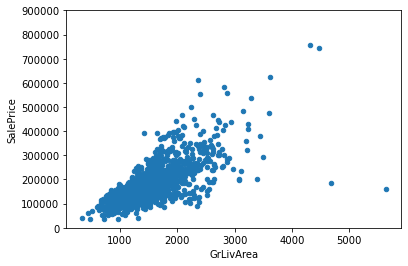

In [4]:
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,900000));

Positive correlation between SalePrice and livng area square footage

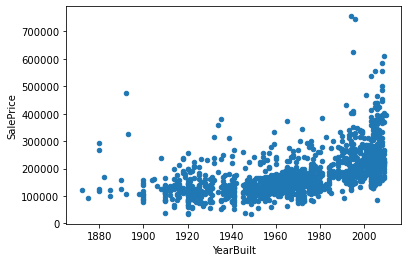

In [5]:
data = pd.concat([train_df['SalePrice'], train_df['YearBuilt']], axis=1)
data.plot.scatter(x='YearBuilt', y='SalePrice');

Exponential like correlation between SalePrice and YearBuilt

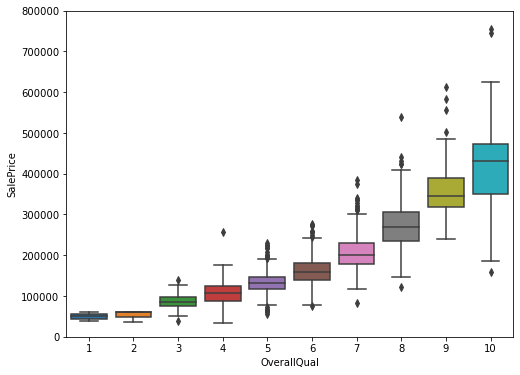

In [6]:
data = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Positive correlation between SalePrice and OverallQual

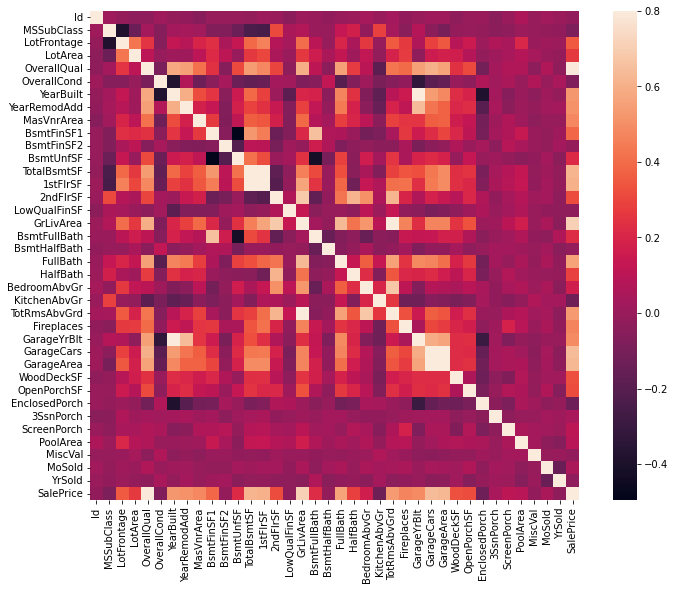

In [7]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Corrleation between features

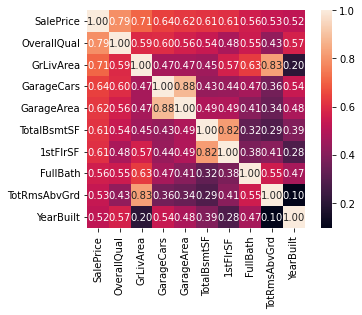

In [8]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Correlation between top 10 most correlated features with respect to SalePrice

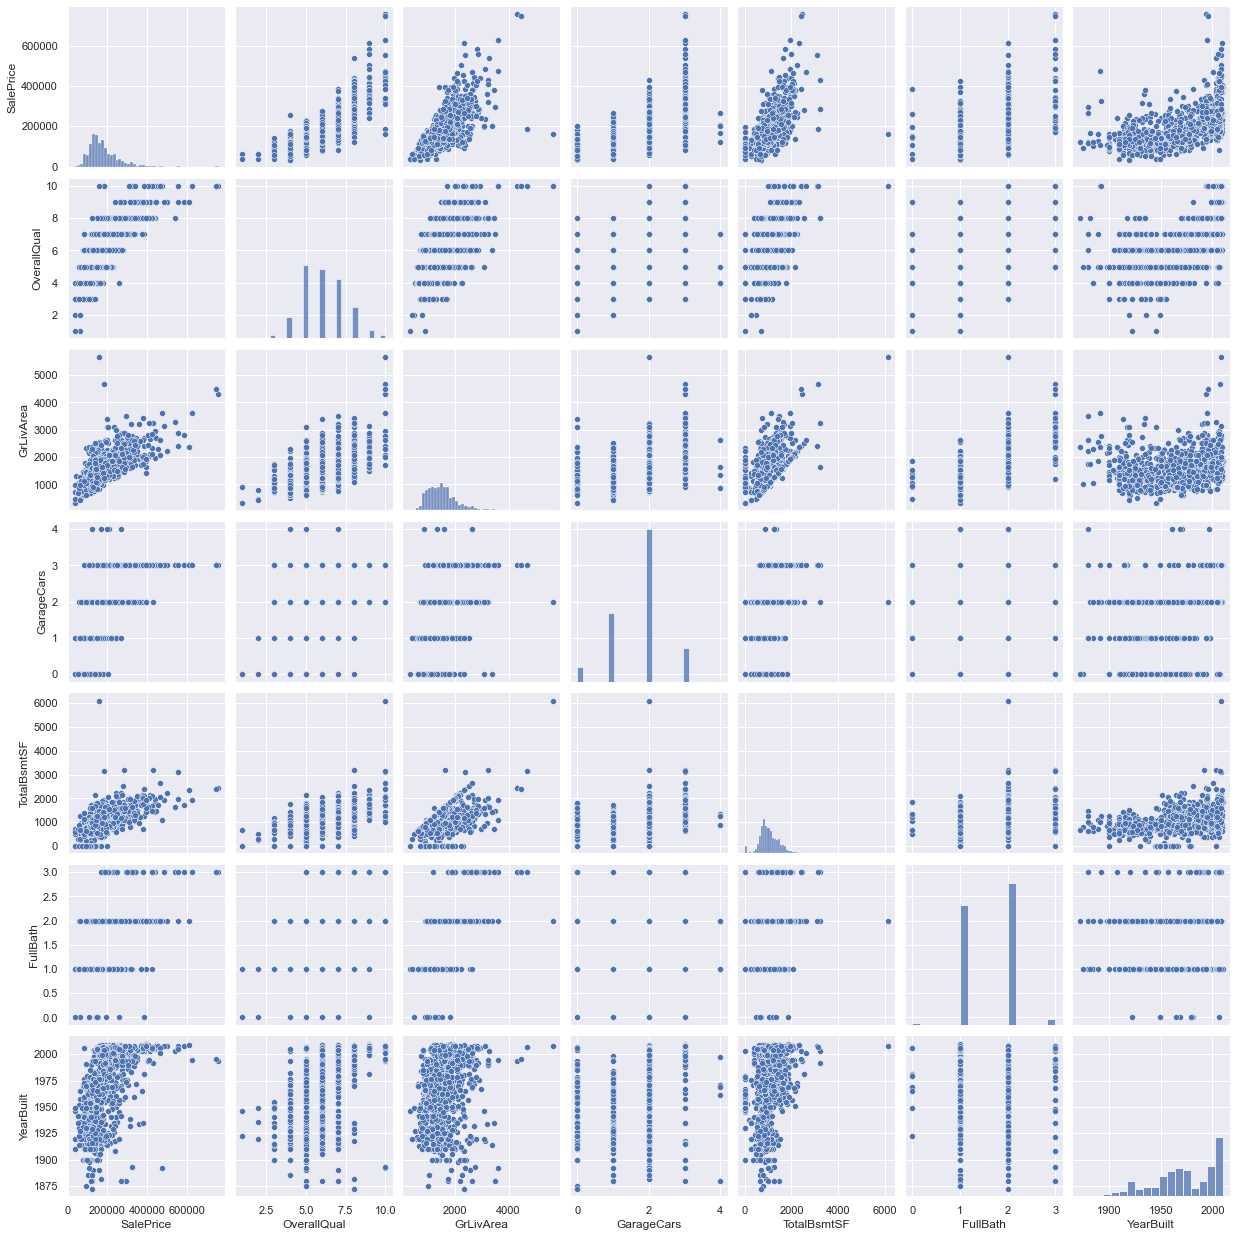

In [9]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 2.5)
plt.show();

## Data Processing

In [10]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [11]:
train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
print("Number of missing data in dataframe:", train_df.isnull().sum().max())

Number of missing data in dataframe: 0


/var/folders/wy/jsl87gh50jgd1lk8n1z73vjw0000gn/T/ipykernel_94331/1275121959.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)


Removing features with missing data

In [12]:
train = pd.get_dummies(train_df)

Converting categorical data to numerical data

## Trying Base Models

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
y = train['SalePrice']

x = train.drop('SalePrice', axis = 1)
x = train.drop('Id', axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 1.00
Test set score: 1.00


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [20]:
decision_model = DecisionTreeRegressor()  
decision_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
print("Training set score: {:.2f}".format(decision_model.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(decision_model.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


In [22]:
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [23]:
print("Training set score: {:.2f}".format(forest_model.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(forest_model.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


In [24]:
xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
print("Training set score: {:.2f}".format(xg_model.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(xg_model.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


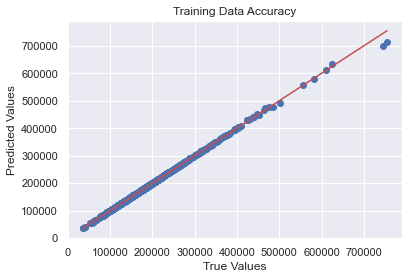

In [26]:
p1 = max(max(forest_model.predict(X_train)), max(y_train))
p2 = min(min(forest_model.predict(X_train)), min(y_train))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.title('Training Data Accuracy')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.scatter(y_train, forest_model.predict(X_train))

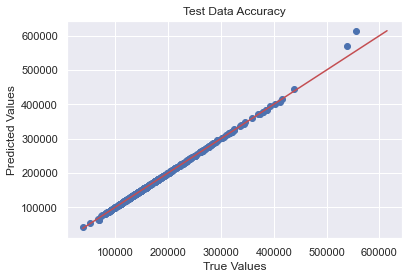

In [27]:
p1 = max(max(forest_model.predict(X_test)), max(y_test))
p2 = min(min(forest_model.predict(X_test)), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.title('Test Data Accuracy')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test, forest_model.predict(X_test))

# DNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping 


In [29]:
model = Sequential()

model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'mse')

2022-03-15 19:16:38.933993: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X_train,y=y_train,
          validation_split=0.1,
          batch_size=128,epochs=400)


Epoch 1/400
8/8 [==============================] - 1s 21ms/step - loss: 34286151680.0000 - val_loss: 15041811456.0000
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 6940481024.0000 - val_loss: 5417313280.0000
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 2036107136.0000 - val_loss: 1719552128.0000
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 1293294848.0000 - val_loss: 141544848.0000
Epoch 5/400
8/8 [==============================] - 0s 4ms/step - loss: 455739936.0000 - val_loss: 7755855.0000
Epoch 6/400
8/8 [==============================] - 0s 4ms/step - loss: 173876640.0000 - val_loss: 33889032.0000
Epoch 7/400
8/8 [==============================] - 0s 4ms/step - loss: 52031996.0000 - val_loss: 43212772.0000
Epoch 8/400
8/8 [==============================] - 0s 4ms/step - loss: 20835662.0000 - val_loss: 26416872.0000
Epoch 9/400
8/8 [==============================] - 0s 5ms/step - loss: 14450493.0000 - val_lo

8/8 [==============================] - 0s 4ms/step - loss: 88484.7031 - val_loss: 90753.8828
Epoch 77/400
8/8 [==============================] - 0s 4ms/step - loss: 87593.8750 - val_loss: 97159.0391
Epoch 78/400
8/8 [==============================] - 0s 4ms/step - loss: 80661.3047 - val_loss: 86778.9453
Epoch 79/400
8/8 [==============================] - 0s 4ms/step - loss: 78291.0000 - val_loss: 80903.2891
Epoch 80/400
8/8 [==============================] - 0s 4ms/step - loss: 79430.8828 - val_loss: 101161.5547
Epoch 81/400
8/8 [==============================] - 0s 4ms/step - loss: 77100.9844 - val_loss: 103923.5625
Epoch 82/400
8/8 [==============================] - 0s 4ms/step - loss: 79954.6562 - val_loss: 119917.4375
Epoch 83/400
8/8 [==============================] - 0s 4ms/step - loss: 82762.8359 - val_loss: 130600.2344
Epoch 84/400
8/8 [==============================] - 0s 4ms/step - loss: 87662.5156 - val_loss: 94106.2109
Epoch 85/400
8/8 [==============================] - 0s 

Epoch 153/400
8/8 [==============================] - 0s 4ms/step - loss: 18510.7520 - val_loss: 71636.9766
Epoch 154/400
8/8 [==============================] - 0s 4ms/step - loss: 17488.5879 - val_loss: 68533.8203
Epoch 155/400
8/8 [==============================] - 0s 4ms/step - loss: 15401.9922 - val_loss: 67445.6875
Epoch 156/400
8/8 [==============================] - 0s 4ms/step - loss: 15453.7480 - val_loss: 67893.6719
Epoch 157/400
8/8 [==============================] - 0s 4ms/step - loss: 14581.9229 - val_loss: 66902.9141
Epoch 158/400
8/8 [==============================] - 0s 4ms/step - loss: 14440.9678 - val_loss: 69445.9453
Epoch 159/400
8/8 [==============================] - 0s 4ms/step - loss: 14480.3691 - val_loss: 64817.0156
Epoch 160/400
8/8 [==============================] - 0s 4ms/step - loss: 13820.3027 - val_loss: 67935.9844
Epoch 161/400
8/8 [==============================] - 0s 4ms/step - loss: 14615.4229 - val_loss: 68581.4141
Epoch 162/400
8/8 [==================

Epoch 230/400
8/8 [==============================] - 0s 4ms/step - loss: 7073.6206 - val_loss: 28592.4219
Epoch 231/400
8/8 [==============================] - 0s 4ms/step - loss: 7283.1733 - val_loss: 30218.4336
Epoch 232/400
8/8 [==============================] - 0s 4ms/step - loss: 6562.0908 - val_loss: 27253.5078
Epoch 233/400
8/8 [==============================] - 0s 4ms/step - loss: 5724.4155 - val_loss: 33224.5234
Epoch 234/400
8/8 [==============================] - 0s 4ms/step - loss: 5850.6084 - val_loss: 29278.7383
Epoch 235/400
8/8 [==============================] - 0s 4ms/step - loss: 6042.2012 - val_loss: 33925.7070
Epoch 236/400
8/8 [==============================] - 0s 4ms/step - loss: 7696.9717 - val_loss: 30696.5664
Epoch 237/400
8/8 [==============================] - 0s 4ms/step - loss: 7524.9116 - val_loss: 32848.3203
Epoch 238/400
8/8 [==============================] - 0s 4ms/step - loss: 5523.6167 - val_loss: 31689.7988
Epoch 239/400
8/8 [===========================

8/8 [==============================] - 0s 4ms/step - loss: 1352.7657 - val_loss: 19202.1270
Epoch 308/400
8/8 [==============================] - 0s 4ms/step - loss: 1222.9856 - val_loss: 18709.0000
Epoch 309/400
8/8 [==============================] - 0s 4ms/step - loss: 1149.9135 - val_loss: 18972.5273
Epoch 310/400
8/8 [==============================] - 0s 4ms/step - loss: 1251.5494 - val_loss: 17393.2461
Epoch 311/400
8/8 [==============================] - 0s 4ms/step - loss: 1154.6511 - val_loss: 17428.0566
Epoch 312/400
8/8 [==============================] - 0s 4ms/step - loss: 1265.6685 - val_loss: 17207.6250
Epoch 313/400
8/8 [==============================] - 0s 4ms/step - loss: 1694.7052 - val_loss: 18680.4062
Epoch 314/400
8/8 [==============================] - 0s 4ms/step - loss: 1714.0354 - val_loss: 20585.8594
Epoch 315/400
8/8 [==============================] - 0s 4ms/step - loss: 2449.2615 - val_loss: 19992.3066
Epoch 316/400
8/8 [==============================] - 0s 4ms/

Epoch 385/400
8/8 [==============================] - 0s 4ms/step - loss: 796.8951 - val_loss: 15090.4619
Epoch 386/400
8/8 [==============================] - 0s 4ms/step - loss: 1152.3198 - val_loss: 13655.7432
Epoch 387/400
8/8 [==============================] - 0s 4ms/step - loss: 1653.1033 - val_loss: 16417.3027
Epoch 388/400
8/8 [==============================] - 0s 4ms/step - loss: 2869.4385 - val_loss: 13765.9092
Epoch 389/400
8/8 [==============================] - 0s 4ms/step - loss: 1580.5022 - val_loss: 13828.4980
Epoch 390/400
8/8 [==============================] - 0s 4ms/step - loss: 1044.2307 - val_loss: 13545.8213
Epoch 391/400
8/8 [==============================] - 0s 4ms/step - loss: 645.8262 - val_loss: 13413.7520
Epoch 392/400
8/8 [==============================] - 0s 4ms/step - loss: 881.3819 - val_loss: 12585.9160
Epoch 393/400
8/8 [==============================] - 0s 4ms/step - loss: 615.7258 - val_loss: 13164.9053
Epoch 394/400
8/8 [==============================]

<AxesSubplot:>

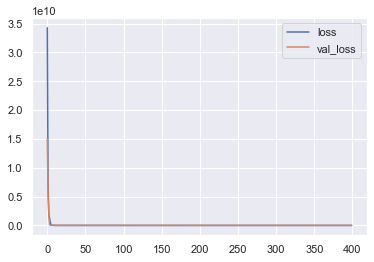

In [31]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               22200     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)              

<AxesSubplot:>

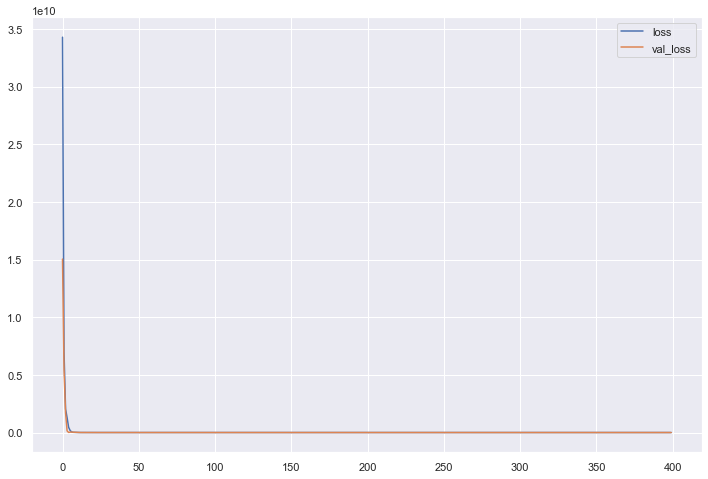

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 16.835500499429223
MSE: 472.5605846735985
RMSE: 21.738458654504427
VarScore: 0.9999999238855828


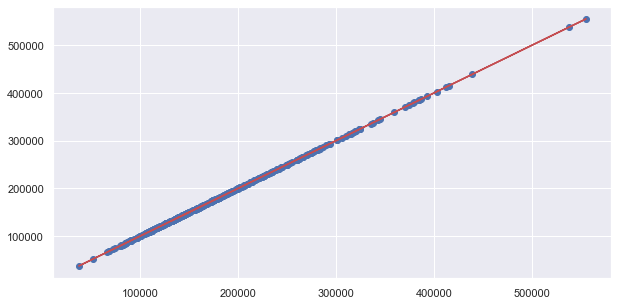

In [34]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')